In [14]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.linear_model import LinearRegression

In [15]:
csv_data = pd.read_csv('CPI.csv', header = 0)

In [16]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [17]:
def univariateLinearRegression(Xvar = None, yvar = None, df = None):
    '''
        Function to perform Linear Regression with Xvar and yvar in df.
        Prints the required plots within the function. Returns nothing.
    '''    
    # Extract Response and Predictors
    y = pd.DataFrame(df[yvar])
    X = pd.DataFrame(df[Xvar])

    # Split the Dataset into random Train and Test (80:20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model

    # Print the coefficients of the Regression Line
    print('Intercept \t: b = ', linreg.intercept_)
    print('Coefficients \t: a = ', linreg.coef_)
    
    # Formula for the Regression line
    regline_x = X_train
    regline_y = linreg.intercept_ + linreg.coef_ * X_train
    
    # Predict Response corresponding to Predictors
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)
    
    # Plot the Predictions vs the True values
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    axes[0].scatter(X_train, y_train, color = "blue")
    axes[0].plot(regline_x, regline_y, 'r-', linewidth = 3)
    axes[0].set_title("Regression Line on Train Set")
    axes[1].scatter(X_test, y_test, color = "green")
    axes[1].scatter(X_test, y_test_pred, color = "red")
    axes[1].set_title("Model Prediction on Test Set")
    plt.show()

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Prediction Accuracy of Model \tTest Dataset")
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()

# Cost of education

#### Removal of all “outliers” from the dataset so that it is clean.

In [18]:
# Extract the two variables for simplicity
targetData = csv_data[['ID', 'Education']].copy()
# Make a clean "copy" and not just a slice of the dataset

ID           0
Education    0
dtype: int64

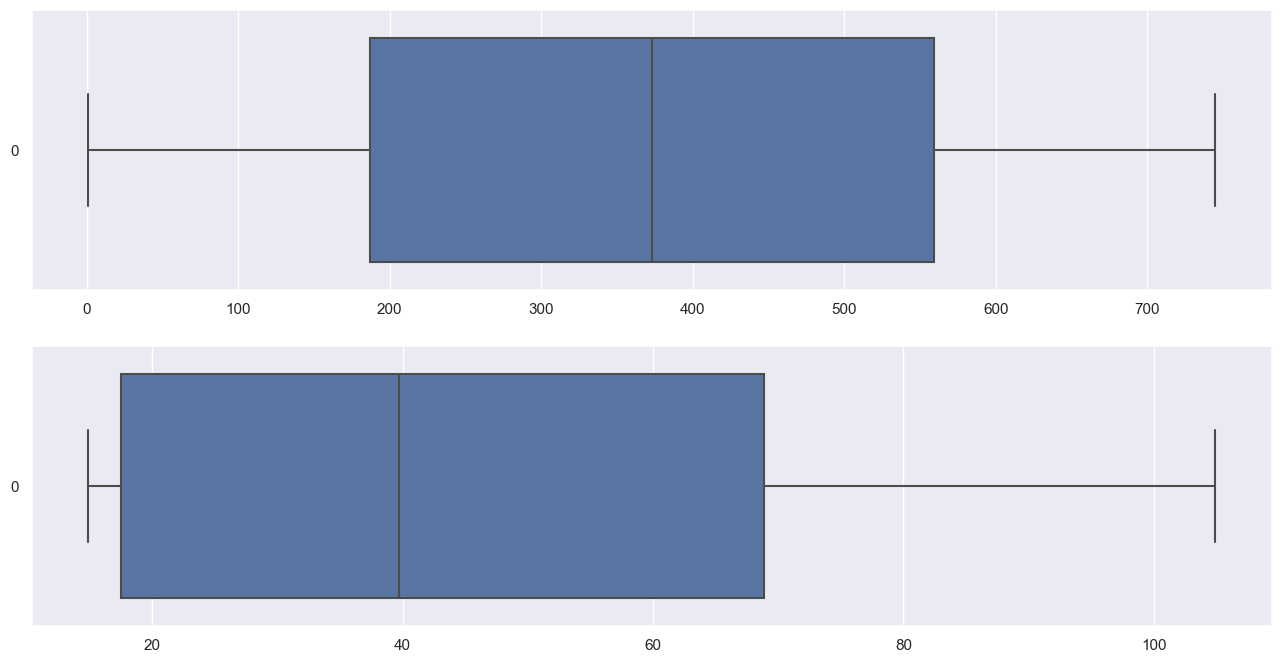

In [19]:
# Draw the boxplots
f, axes = plt.subplots(2, 1, figsize=(16, 8))

sb.boxplot(data = targetData["ID"], orient = "h", ax = axes[0])
sb.boxplot(data = targetData["Education"], orient = "h", ax = axes[1])

# Calculate the quartiles
Q1 = targetData.quantile(0.25)
Q3 = targetData.quantile(0.75)

# Rule to identify outliers
rule = ((targetData < (Q1 - 1.5 * (Q3 - Q1))) | (targetData > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

In [20]:
# Calculate the quartiles
Q1 = targetData.quantile(0.25)
Q3 = targetData.quantile(0.75)

# Rule to identify outliers
rule = ((targetData < (Q1 - 1.5 * (Q3 - Q1))) | (targetData > (Q3 + 1.5 * (Q3 - Q1))))

# Check the dataframe rule
rule

,ID,Education
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
740,False,False
741,False,False
742,False,False
743,False,False


In [21]:
# Find the rows where ANY column is True
outliers = rule.any(axis = 1)   # axis 0 is row, 1 is column

# Check the outliers -- it's a boolean Series
outliers

0      False
1      False
2      False
3      False
4      False
       ...  
740    False
741    False
742    False
743    False
744    False
Length: 745, dtype: bool

In [22]:
# How many points are outliers for the two variables combined?
outliers.value_counts()

False    745
dtype: int64

In [23]:
# Which row indices correspond to outliers in the dataframe?
outlierindices = outliers.index[outliers == True]
outlierindices

Int64Index([], dtype='int64')

In [24]:
# Remove the outliers based on the row indices obtained above
targetData.drop(axis = 0,               # 0 drops row 1 drops column
                index = outlierindices, # this takes a list as input
                inplace = True)         # not overwritten by default 

# Check the clean data
targetData

,ID,Education
0,745,104.908
1,744,103.784
2,743,103.357
3,742,103.219
4,741,103.174
...,...,...
740,5,14.874
741,4,14.874
742,3,14.874
743,2,14.874


Intercept 	: b =  [-2.56065329]
Coefficients 	: a =  [[0.13006401]]


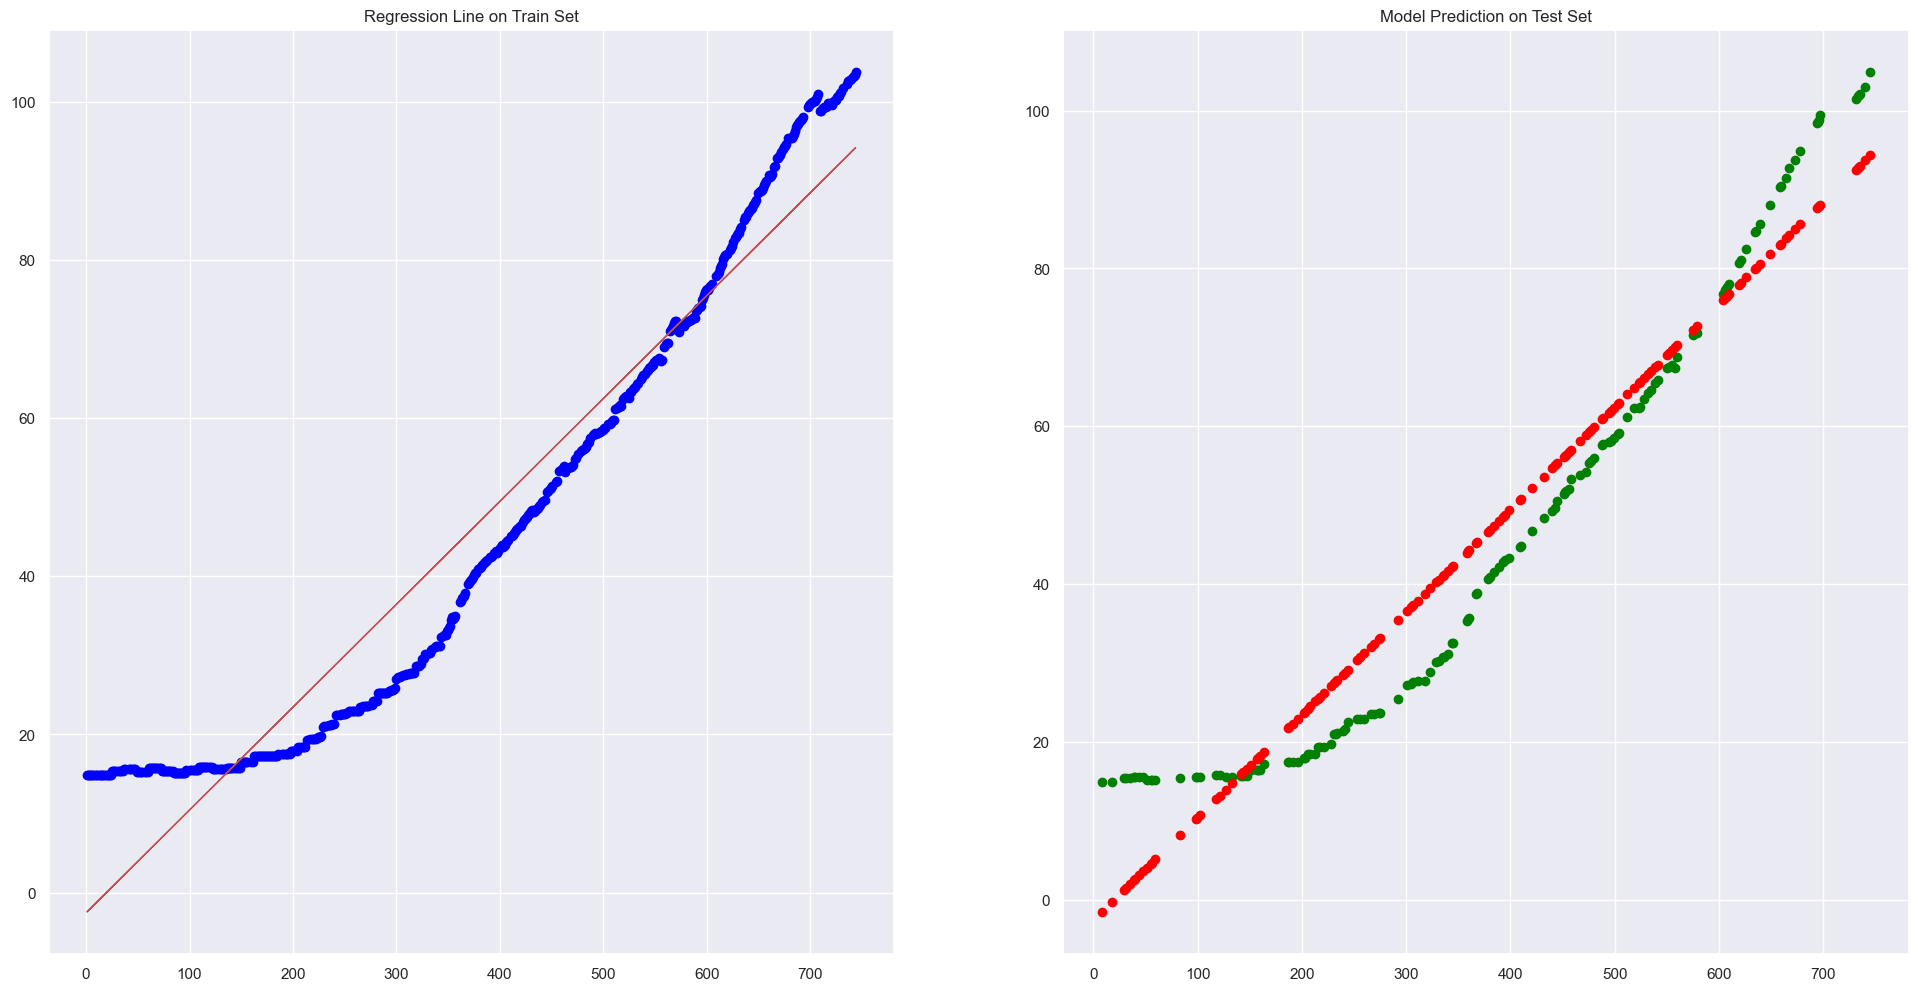

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9357754870779726
Mean Squared Error (MSE) 	: 55.16023280343438

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 51.3543569481103



In [25]:
univariateLinearRegression(Xvar = "ID", yvar = "Education", df = targetData)